In [1]:
!pip install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.8 MB/s eta 0:00:00


In [2]:
!pip install segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=570c77df89f4b3f177216ca3730c65a6b0ec567b90aa997a325145ad9a6ee660
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=62de4a6576c0e216bff82e99a937f3ca08f11fbbc62ec1ad287856ca9d1420a9
  Stored in directory: /root/.cache/pip/wheel

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn 
from PIL import Image
import os
import pandas as pd
import json
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import random
from skimage import draw
import albumentations as A
import tifffile

import pandas as pd 

from IPython.display import IFrame
import tqdm

import cv2

import tensorflow as tf
import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "nvidia/segformer-b0-finetuned-ade-512-512"
feature_extractor = SegformerFeatureExtractor.from_pretrained(model_name)
model = SegformerForSemanticSegmentation.from_pretrained(model_name)
model.to(device)

SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  

In [ ]:
model.decode_head

In [46]:
class Custom_Layer(torch.nn.Module):

  def __init__(self):
    super().__init__()

    self.layers = torch.nn.Sequential(
    torch.nn.Conv2d(150, 1, kernel_size = 1, stride = 1, bias = False),
    torch.nn.BatchNorm2d(1),
    torch.nn.ReLU(),
    torch.nn.Conv2d(1, 1, kernel_size = 1, stride = 1)
    )
  def forward(self, x):
    return self.layers(x)

In [49]:
layers = Custom_Layer().to(device)

In [50]:
model.decode_head = torch.nn.Sequential(
    model.decode_head, layers
).to(device)

In [51]:
model.decode_head

Sequential(
  (0): SegformerDecodeHead(
    (linear_c): ModuleList(
      (0): SegformerMLP(
        (proj): Linear(in_features=32, out_features=256, bias=True)
      )
      (1): SegformerMLP(
        (proj): Linear(in_features=64, out_features=256, bias=True)
      )
      (2): SegformerMLP(
        (proj): Linear(in_features=160, out_features=256, bias=True)
      )
      (3): SegformerMLP(
        (proj): Linear(in_features=256, out_features=256, bias=True)
      )
    )
    (linear_fuse): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (batch_norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
    (dropout): Dropout(p=0.1, inplace=False)
    (classifier): Conv2d(256, 150, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Custom_Layer(
    (layers): Sequential(
      (0): Conv2d(150, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_run

In [157]:
imgs = torch.rand(5, 3, 512, 512).to(device)
output = model(imgs)

In [158]:
logits = output.logits
logits.shape

torch.Size([5, 1, 128, 128])

In [159]:
transform = A.Compose([
        A.Resize(width = 512 , height = 512) , 
        A.Normalize(
            mean = [0.5 , 0.5 , 0.5] , 
            std = [1 , 1 , 1] , 
            max_pixel_value = 255
        ) , 
        A.HorizontalFlip(),
        A.OpticalDistortion(),
        ToTensorV2()
    ])

In [160]:
test_dir = "/content/drive/MyDrive/hubmap-hacking-the-human-vasculature/test"
train_dir = "/content/drive/MyDrive/hubmap-hacking-the-human-vasculature/train"

In [161]:
with open("/content/drive/MyDrive/hubmap-hacking-the-human-vasculature/sample_submission.csv" , "r") as f:
    k = list(f)
print(k[0])

id,height,width,prediction_string



In [179]:
class hubmapDataset(Dataset):
    
    def __init__(self, image_dir, labels_file, transform = None):
        
        with open(labels_file, 'r') as json_file:
            self.json_labels = [json.loads(line) for line in json_file]

        self.image_dir = image_dir
        self.transform = transform


    __len__ = lambda self : len(self.json_labels)    
        
    def __getitem__(self, idx):
        
        image_path = os.path.join(self.image_dir, f"{self.json_labels[idx]['id']}.tif")
        image = Image.open(image_path)

        
        mask = np.zeros((512, 512), dtype=np.float32)

        for annot in self.json_labels[idx]['annotations']:

            cords = annot['coordinates']
            
            if annot['type'] == "blood_vessel":
                
                for cord in cords:
                    
                    rr, cc = np.array([i[1] for i in cord]), np.asarray([i[0] for i in cord])
                    
                    mask[rr, cc] = 1

        image = torch.tensor(np.array(image), dtype = torch.float32).permute(2,0,1)
        mask = torch.tensor(mask, dtype=torch.float32)
        if self.transform:
             augmented = self.transform(image=image)
             image = augmented['image']

        return image, mask

In [180]:
train_dataset = hubmapDataset(image_dir = train_dir, 
                        labels_file = '/content/drive/MyDrive/hubmap-hacking-the-human-vasculature/polygons.jsonl')
train_dataset

In [204]:
train_dataloader = DataLoader(train_dataset, batch_size = 2, shuffle = True)
train_dataloader

In [205]:
image, mask = next(iter(train_dataloader))
print(image.shape)
print(mask.shape)

torch.Size([2, 3, 512, 512])
torch.Size([2, 512, 512])


In [208]:
def plot_image_and_mask(image, mask):
    fig, ax = plt.subplots(1, 2, figsize=(8, 8))

    # Transpose the dimensions to height, width, channels for plotting
    image = image.transpose((1, 2, 0))

    # Plot the image
    ax[0].imshow(image, cmap = 'gray')  
    ax[0].set_title("Image")
    ax[0].axis('off')

    # Plot the mask
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Mask 'Blood_vessel'")
    ax[1].axis('off')

    plt.show()

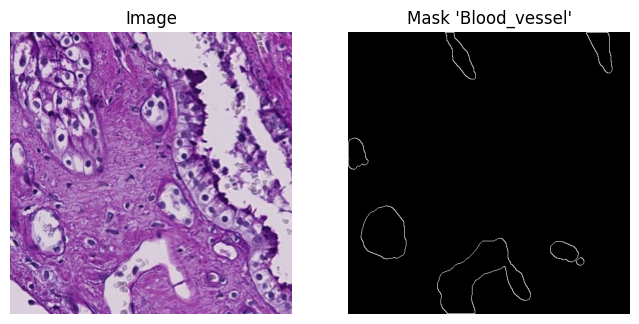

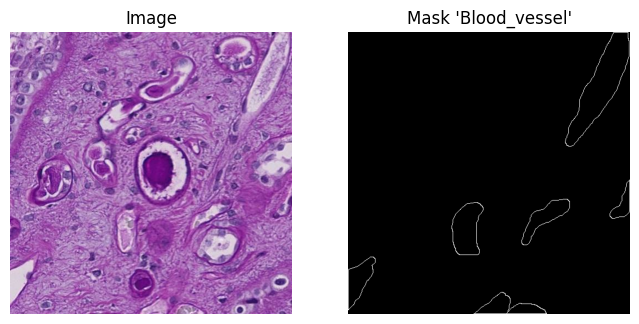

In [209]:
for i in range(0, 2):
  plot_image_and_mask(image[i].numpy()/255, mask[i].numpy())

In [187]:
class CustomLoss(nn.Module):
    
    def __init__(self):
        
        super(CustomLoss,self).__init__()
        
        self.diceloss = smp.losses.DiceLoss(mode='binary')
        self.binloss = smp.losses.SoftBCEWithLogitsLoss(reduction = 'mean' , smooth_factor = 0.1)

    def forward(self, output, mask):
        
        output = output.reshape(output.size(0), -1)
        
        mask = mask.reshape(mask.size(0), -1)
        
        dice = self.diceloss(output , mask)
        bce = self.binloss(output , mask)
        
        loss = dice * 0.7 + bce * 0.3
        
        return loss

In [188]:
class DiceCoef(nn.Module):
    
    def __init__(self, weight=None, size_average=True):
    
        super().__init__()

    def forward(self, y_pred, y_true, smooth=1.):
        
        y_true = y_true.view(-1)
        y_pred = y_pred.view(-1)
        
        y_pred = torch.round((y_pred - y_pred.min()) / (y_pred.max() - y_pred.min()))
        
        intersection = (y_true * y_pred).sum()
        
        dice = (2.0 * intersection + smooth)/(y_true.sum() + y_pred.sum() + smooth)
        
        return dice

In [189]:
model.train()
train_loss = 0 
score = 0

In [190]:
loss_func = CustomLoss()
dice_coe = DiceCoef()


optimizer = torch.optim.AdamW(model.parameters(), lr = 6e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 100, eta_min = 0)

In [191]:
save_path = "/content/drive/MyDrive/hubmap-hacking-the-human-vasculature/model_weights.pth"

In [193]:
for epoch in tqdm.notebook.tqdm(range(5)):   
    torch.cuda.empty_cache()     
    model.train()
    train_loss = 0
    score = 0

    for data in tqdm.notebook.tqdm(train_dataloader ,total = len(train_dataloader)):
        torch.cuda.empty_cache()
        optimizer.zero_grad()
        img, mask = data

        img = img.to(device)
        mask = mask.to(device)
        mask = torch.nn.functional.interpolate(mask.unsqueeze(1), size = (128, 128), mode = 'bilinear', align_corners = False)

        logit = model(img)
        outputs = logit.logits
        loss =  loss_func(outputs , mask)

        loss.backward()
        optimizer.step()
    

        train_loss += loss.item()

    scheduler.step()
        
    print('EPOCH: {}   LOSS : {}     '.format(epoch+1, train_loss))

    torch.save(model.state_dict(), save_path)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

EPOCH: 1   LOSS : 710.968318939209     


  0%|          | 0/817 [00:00<?, ?it/s]

EPOCH: 2   LOSS : 707.2154093384743     


  0%|          | 0/817 [00:00<?, ?it/s]

EPOCH: 3   LOSS : 703.6452511548996     


  0%|          | 0/817 [00:00<?, ?it/s]

EPOCH: 4   LOSS : 700.2421360015869     


  0%|          | 0/817 [00:00<?, ?it/s]

EPOCH: 5   LOSS : 696.2877026051283     


In [211]:
image, mask = next(iter(train_dataloader))
image = image.to(device)
print(image.shape)
print(mask.shape)

torch.Size([2, 3, 512, 512])
torch.Size([2, 512, 512])


In [212]:
output = model(image)
output = output.logits
output.shape

torch.Size([2, 1, 128, 128])

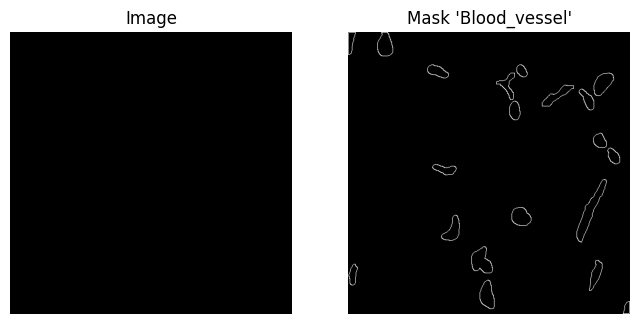

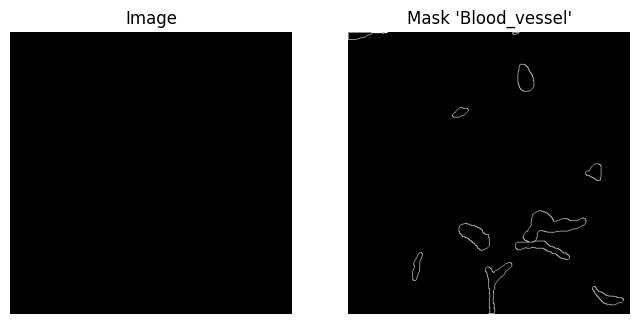

In [213]:

for i in range(0, 2):
  plot_image_and_mask(output[i].cpu().detach().numpy()/255, mask[i].cpu().numpy())